# Generating Random Samples

## Inversion method

If we want to simulate a sample $x$ of the RV $X$, which follows the distribution function $F_X(x)$

1. Calculate the inverse function of $F_X(x)$, $F^{-1}_X(x)$. We may need to use the definition of *generalized inverse* of $F$:

    $F^{-1}(u):=inf\{x:F(x)\geq u\}\, for\,0<u<1$
2. Generate a smaple $u$ from Uniform distribution $U\sim U(0,1)$
3. Set $x:=F^{-1}_X(u)$

### Example

We want to simulate the exponential distribution with $\lambda = 1$ *i.e* $F(x)=1-e^{\lambda x}$, $x>0$
1. the inverse distribution function is $F^{-1}_X(y)=\frac{-ln(1-y)}{\lambda}$
2. $U\sim U(0,1)$
3. $x :=F^{-1}_X(u)=\frac{-ln(1-u)}{\lambda}$

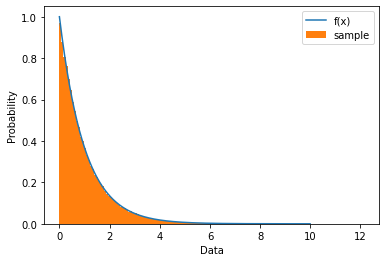

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

lamda = 1
N = 100000
x = np.arange(0,10,0.01)


def inv_F(u):  # generate inverse function
    return -np.log(1-u) / lamda

def main():  # generate samples
    u = np.random.uniform(0,1,N)
    sample = inv_F(u)
    return(sample)
    
sample = main()

plt.plot(x,lamda * np.exp(-lamda * x),label = 'f(x)')
plt.hist(sample, bins = 150, density=True,label = 'sample')
plt.ylabel('Probability')
plt.xlabel('Data')
plt.legend()
plt.show()


## Accepting Rejection Method
We would like to generate random samples $x$ from RV $X$, which has a continuous pdf $f$, named *target-function*. However it is costly to directly generate $x$. We can apply two following assistants:
- Uniform distribution $U(0,1)$
- a known pdf $g$, named *proposal-density*, that generate samples from $g$ is more convenient. (sometimes $g$ can be pdf of uniform distribution)
   - $f$ and $g$ have compatible supports, namely $g(x)>0$ whenever $f(x)>0$.
   - exists constant $c>0$ that, $f(x) \leq cg(x)$, we can define $c = max\frac{f(x)}{g(x)}$

Then sampling steps are:
1. Generate sample $u$ from $U\sim U(0,1)$
2. Generate sample $y$ from $Y$,which pdf is $g$ (*proposal-density*)
3. 
- If $u \leq \frac{f(y)}{cg(y)}$, then $y$ is a sample from *target-density*, we accept $y$ as $x:=y$.
- If not, return to step 1.


### Example
We would like to generate samples from the *target-density* $f(x)=\frac{1}{\sqrt{2\pi}} e^{(-\frac{x^2}{2})}$, which is Normal distribution.

We can define our *proposal-density* $g(x) = \frac{\exp(-|x|)}{2}$, Laplace (Double exponential) distribution.

Define $\frac{f(x)}{g(x)}=\sqrt{\frac{2}{\pi}}e^{-\frac{1}{2}x^2+|x|}\leq \sqrt{\frac{2e}{\pi}}:=c$

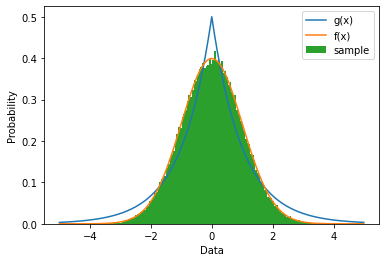

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 100000
c = np.sqrt(2 * np.e / np.pi)
t = np.arange(-5,5,0.01)
sample = []

def g(x):
    return(np.exp(-np.abs(x)) / 2)
def f(x):
    return(1 / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2))

def Accept_Reject():
    for i in range(N):
        y = np.random.laplace(loc = 0,scale = 1)
        u = np.random.uniform(0,1)
        if u <= 1 / c * f(y) / g(y):
            sample.append(y)
    return(sample)

s = Accept_Reject()


plt.plot(t,g(t),label = 'g(x)')
plt.plot(t,f(t),label = 'f(x)')
plt.hist(s, bins = 150, density=True,label = 'sample')
plt.ylabel('Probability')
plt.xlabel('Data')
plt.legend()
plt.show()


## Methods for Normal Random Variables
- Simulating 1-d Normal: Box-Muller Method
- Simulating n-d correlated Normal: Matrix Decomposition

### 1-d Case: Box-Muller
We can use the following proposition:
If $Z\sim N(0,I_2)$,then：
- $R=Z_1^2+Z_2^2$ is exponentially distribution with mean 2,i.e.,$P(R\leq x)=1-e^{-x/2}$.
- given $R$, the point $(Z_1,Z_2)$ is uniformly distributed on the circle od radius $\sqrt{R}$ centered at the origin.

The sampling steps are:
1. Sample $r$ from the exponential distribution $p(x)=1-e^{-x/2}$.
2. Sample $\theta$ from the uniform distribution on $(0,2\pi)$.
3. Let $z_1 = \sqrt{r}\cos \theta$ and $z_2 = \sqrt{r}\sin \theta$.

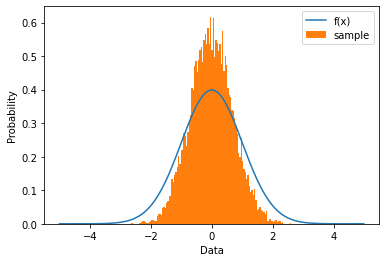

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 10000
Z1_sample = []
Z2_sample = []
t = np.arange(-5,5,0.01)

def f(x):
    return(1 / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2))

def Box_Muller():
    for i in range(N):
        r = np.random.exponential(scale=1)
        theta = np.random.uniform(0,2 * np.pi)
        Z1_sample.append(np.sqrt(r) * np.cos(theta))
        Z2_sample.append(np.sqrt(r) * np.sin(theta))
    return(Z1_sample,Z2_sample)

Z1,Z2 = Box_Muller()

plt.plot(t,f(t),label = 'f(x)')
plt.hist(Z1, bins = 120, density=True,label = 'sample')
plt.ylabel('Probability')
plt.xlabel('Data')
plt.legend()
plt.show()